## MLB Analysis

這次我們會簡單的幾句話跟大家說明資料科學在美國職棒的運用及影響，以下我們會分析下列幾項：

* 調整物價波動後，大聯盟平均薪資的變化
* 飛球革命對於大聯盟的影響
* 整體薪資和戰績的關係

資料來源:
    <a href="https://www.fangraphs.com/">FanGraph</a>
    <a href="https://www.baseball-reference.com/leagues/MLB/">Baseball-Refernce</a>
    
### 首先先匯入會用到的函式庫

In [91]:
library(ggplot2)
library(dplyr)
library(robustbase)

In [92]:
head(read.csv("球隊薪資\\2018.csv"))
head(read.csv("戰績\\2018.csv"))
head(read.csv("年度統計\\2018.csv"))

Team,Roster,X25.Man.Payroll,Injured.Reserve,Retained,Buried,Suspended,X2018.Total.Payroll,Rank
Boston Red Sox,36,167955780,18074000,41755860,2180000,0,227398860,1
San Francisco Giants,32,119689218,64341827,21136053,3283000,0,205665348,2
Los Angeles Dodgers,40,160502596,3908850,30541679,5590000,0,199582045,3
Chicago Cubs,37,152092957,37451220,1216894,2725000,3200000,194259933,4
Washington Nationals,35,130197979,8999485,41161720,4481000,0,181382609,5
New York Yankees,38,148010829,22568376,9249414,3130000,0,180098151,6


Name,W,L,PCT,GB,HOME,AWAY,RS,RA,DIFF,STRK,L10
Boston Red Sox,108,54,0.667,-,57-24,51-30,876,647,229,W1,5_5
Houston Astros,103,59,0.636,5,46-35,57-24,797,534,263,L1,8_2
New York Yankees,100,62,0.617,8,53-28,47-34,851,669,182,L1,7_3
Oakland Athletics,97,65,0.599,11,50-31,47-34,813,674,139,L1,6_4
Milwaukee Brewers,96,67,0.589,12.5,51-30,45-37,754,659,95,W8,9_1
Chicago Cubs,95,68,0.583,13.5,51-31,44-37,761,645,116,L1,6_4


Tm,R.G,HR.,SO.,BB.,XBH.,X.H.,SO.W,AB.SO,AB.HR,AB.RBI,GB.FB,GO.AO,IP.,LD.,HR.FB,IF.FB
ARI,4.28,2.90%,23.70%,9.10%,7.90%,38%,2.61,3.7,31.0,8.3,0.79,1.08,63%,25%,8.80%,11%
ATL,4.69,2.80%,20.60%,8.20%,8.30%,36%,2.52,4.3,31.9,7.8,0.76,1.01,67%,26%,8.00%,11%
BAL,3.84,3.10%,23.40%,7.00%,7.40%,34%,3.35,3.9,29.3,9.3,0.81,1.09,65%,24%,9.40%,12%
BOS,5.41,3.30%,19.90%,9.00%,9.40%,39%,2.20,4.5,27.0,6.8,0.78,1.04,67%,25%,9.40%,11%
CHC,4.67,2.60%,21.80%,9.00%,7.70%,34%,2.41,4.1,33.7,7.8,0.88,1.17,65%,25%,8.30%,11%
CHW,4.05,3.00%,26.30%,7.00%,7.90%,36%,3.75,3.5,30.3,8.6,0.83,1.10,62%,25%,9.60%,12%


### 讀取檔案資料，並將這些dataframe存入list中

In [105]:
salList <- list()
standingList <- list()
statisticList <- list()
for (i in c(2011:2018))
{
    salList[[i - 2010]] <- read.csv(paste("球隊薪資\\", toString(i), ".csv", sep=""))
    standingList[[i - 2010]] <- read.csv(paste("戰績\\", toString(i), ".csv", sep=""))
    statisticList[[i - 2010]] <- read.csv(paste("年度統計\\", toString(i), ".csv", sep=""))
}

### 處理資料

In [94]:
inflation <- c(1, 1.017, 1.032255, 1.04051304, 1.047796631, 1.069800361, 1.092266168, 1.113019225)
meanSal <- c()

for (i in c(1:8))
{
    meanSal[i] <- mean(salList[[i]][, "X25.Man.Payroll"]) * inflation[i] / 1000000
}


salYear <- data.frame(matrix(ncol=2))
colnames(salYear) <- c("year", "salary")
for (i in c(1:8))
{ 
    tem <- data.frame(year=2010 + i, salary=salList[[i]][, "X25.Man.Payroll"])
    salYear <- rbind(salYear, tem)
    salYear <- salYear[complete.cases(salYear),]
}
salYear <- salYear %>% mutate(salary = salary/1000000)

### Changes of mean salary per year

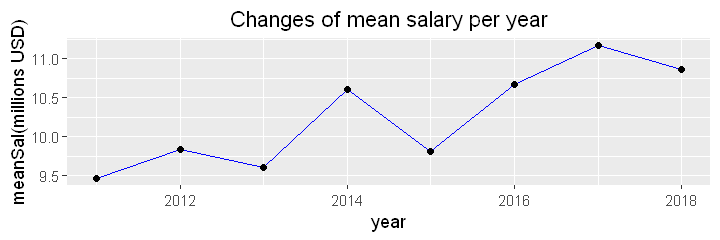

In [95]:
# Create a line plot showing the change in meanSalary over time

options(repr.plot.width=6, repr.plot.height=2)
ggplot(salary, aes(year, meanSalary)) + geom_line(color="blue") + geom_point() +
    ylab("meanSal(millions USD)") + ggtitle("Changes of mean salary per year") +
    theme(plot.title = element_text(hjust=0.5))

### Distribution of salary per year

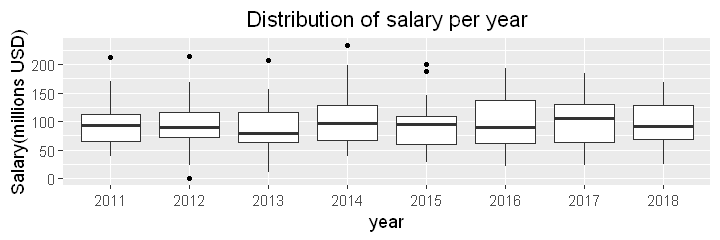

In [96]:
ggplot(salYear, aes(x=as.factor(year), y=salary)) + geom_boxplot(outlier.colour="black", outlier.shape=16, outlier.size=1, notch=FALSE) +
    xlab("year") + ylab("Salary(millions USD)") + ggtitle("Distribution of salary per year") +
    theme(plot.title = element_text(hjust=0.5)) + scale_fill_brewer(palette="RdBu")

In [97]:
# 整理salList 成一個dataframe ,mutate new column---year ,column : X25.Man.Payroll
tmp_data <- lapply(salList,function(x){colnames(x)[8] <- "Total.Payroll" ;return(x)})
names(tmp_data) <- 2011 : 2018
for (i in 1 : length(tmp_data)){
    tmp <- tmp_data[[i]][,c(1,3,8)]
    tmp <- tmp %>% mutate(year = names(tmp_data)[i])
    if(i == 1){
        data <- tmp
    }
    else {
        data <- rbind(data,tmp)
    }
}


data <- data[-61,]
data[,4] <- as.factor(data[,4])

for (i in as.character(2011: 2018))
{
    rd <- read.csv(paste("戰績\\",i,".csv",sep = ""))
    tmp <- rd[,c(1,2)] %>% mutate(year = i)
    
    if(i == 2011)
    {
        new_data <- tmp
    }
    else
    {
        new_data <- rbind(new_data,tmp)
    }
}
colnames(new_data)[1] <- "Team"
data <- data %>% arrange(year,Team)
new_data <- new_data %>% arrange(year,Team)
final_data <- merge(data,new_data,by = c("Team","year"))
final_data <- final_data %>% mutate(X25.Man.Payroll = X25.Man.Payroll / 1000000)

### 利用25人名單的薪資對戰績做回歸

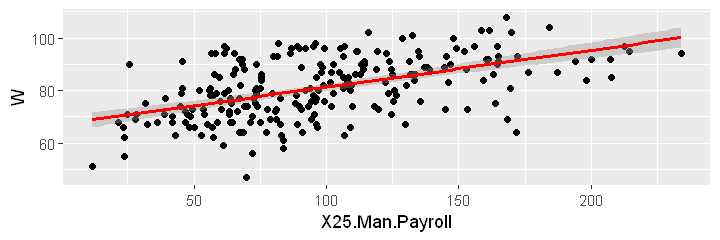

In [98]:
ggplot(final_data, aes(x = X25.Man.Payroll, y = W)) + 
  geom_point() +
  stat_smooth(method = "lmrob", col = "red")

In [99]:
a <- lmrob(W ~ X25.Man.Payroll, data=final_data)
summary(a)


Call:
lmrob(formula = W ~ X25.Man.Payroll, data = final_data)
 \--> method = "MM"
Residuals:
    Min      1Q  Median      3Q     Max 
-30.049  -6.137  -0.196   6.377  21.098 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     67.26091    1.57118   42.81   <2e-16 ***
X25.Man.Payroll  0.14045    0.01404   10.01   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Robust residual standard error: 9.7 
Multiple R-squared:  0.2748,	Adjusted R-squared:  0.2718 
Convergence in 9 IRWLS iterations

Robustness weights: 
 24 weights are ~= 1. The remaining 213 ones are summarized as
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3167  0.8459  0.9484  0.9022  0.9854  0.9986 
Algorithmic parameters: 
       tuning.chi                bb        tuning.psi        refine.tol 
        1.548e+00         5.000e-01         4.685e+00         1.000e-07 
          rel.tol         scale.tol         solve.tol       eps.outlier 
        1.000e

In [104]:
for (i in (2011 : 2018))
{
    if(i ==2011)
    {
        statdata <- statisticList[[1]][31,]
        statdata <- statdata %>% mutate(year = i)
    }
    else
    {      
        tmp <-statisticList[[i - 2010]][31,]
        tmp <- tmp %>% mutate(year = i)
        statdata <- rbind(statdata,tmp)
    }
}

head(statdata)

Tm,R.G,HR.,SO.,BB.,XBH.,X.H.,SO.W,AB.SO,AB.HR,AB.RBI,GB.FB,GO.AO,IP.,LD.,HR.FB,IF.FB,year
LgAvg,4.28,2.50%,18.60%,8.10%,7.50%,33%,2.30,4.8,36.4,8.4,0.82,1.09,69%,18%,7.30%,14%,2011
LgAvg,4.32,2.70%,19.80%,8.00%,7.70%,34%,2.48,4.5,33.5,8.3,0.84,1.12,68%,19%,8.10%,13%,2012
LgAvg,4.17,2.50%,19.90%,7.90%,7.40%,32%,2.51,4.5,35.6,8.6,0.82,1.10,68%,23%,7.50%,13%,2013
LgAvg,4.07,2.30%,20.40%,7.60%,7.20%,32%,2.67,4.4,39.6,8.8,0.84,1.10,68%,25%,6.90%,12%,2014
LgAvg,4.25,2.70%,20.40%,7.70%,7.70%,34%,2.66,4.4,33.7,8.4,0.86,1.14,68%,27%,8.20%,13%,2015
LgAvg,4.48,3.00%,21.10%,8.20%,8.00%,35%,2.58,4.2,29.5,8.0,0.83,1.11,66%,26%,9.20%,12%,2016


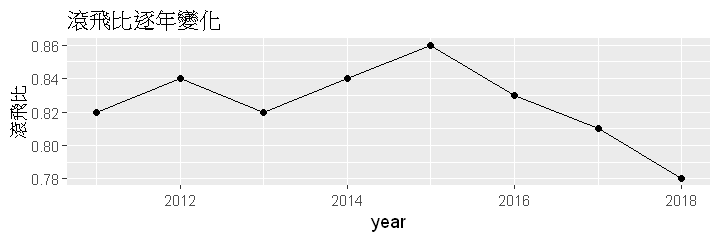

In [103]:
ggplot(statdata, aes(year, GB.FB)) + geom_point() + geom_line() + ylab("滾飛比") + ggtitle("滾飛比逐年變化")